In [244]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, ComplementNB

In [245]:
#https://www.kaggle.com/datasets/ppb00x/credit-risk-customers
df = pd.read_csv("dataset/credit_customers.csv")
df.shape

(1000, 21)

In [246]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


# Realizar a Análise Exploração de Dados (EAD) com pré-processamento

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [248]:
#transformação de dados categoricos em numéricos
obj_columns = df.select_dtypes(['object']).columns
df[obj_columns] = df[obj_columns].apply(lambda x: pd.factorize(x)[0])
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6.0,0,0,1169.0,0,0,4.0,0,0,...,0,67.0,0,0,2.0,0,1.0,0,0,0
1,1,48.0,1,0,5951.0,1,1,2.0,1,0,...,0,22.0,0,0,1.0,0,1.0,1,0,1
2,2,12.0,0,1,2096.0,1,2,2.0,0,0,...,0,49.0,0,0,1.0,1,2.0,1,0,0
3,0,42.0,1,2,7882.0,1,2,2.0,0,1,...,1,45.0,0,1,1.0,0,2.0,1,0,0
4,0,24.0,2,3,4870.0,1,1,3.0,0,0,...,2,53.0,0,1,2.0,0,2.0,1,0,1


In [249]:
X = df.drop(columns = ["class"]).to_numpy()
y = df['class']

In [250]:
gauss = GaussianNB()
kf = StratifiedKFold() #n_splits default 5

In [251]:
for fold, (train, test) in enumerate(kf.split(X, y)): 
    gauss.fit(X[train], y[train])    
    y_pred = gauss.predict(X[test
                            ])
    accuray = accuracy_score(y_pred, y[test])
    print("Accuracy:", accuray)
    #print(classification_report(y_pred, y[test]))
    f1 = f1_score(y_pred, y[test])
    print("F1 Score:", f1)

Accuracy: 0.735
F1 Score: 0.5691056910569107
Accuracy: 0.74
F1 Score: 0.5517241379310344
Accuracy: 0.74
F1 Score: 0.5272727272727273
Accuracy: 0.7
F1 Score: 0.4736842105263158
Accuracy: 0.71
F1 Score: 0.5671641791044775


In [252]:
models = {
    "Bernoulli" : (BernoulliNB(), { }),
    "Complement" : (ComplementNB(), { }),
    "Gauss": (GaussianNB(), { }), 
    "Multinomial" : (MultinomialNB(), { })
}                 

In [253]:
df_score = pd.DataFrame(columns=['Model', 'accuracy', 'precision','recall','f1-score'])

for model, (clf, parameters) in models.items():
        
    for fold, (train, test) in enumerate(kf.split(X, y)):
        best = GridSearchCV(clf, parameters, cv=kf, scoring="f1", return_train_score=True)
        best.fit(X[train], y[train])
        pred = best.predict(X[test])
        
        report = classification_report(y[test], pred, target_names=['Good', 'Bad'])
        print(f'{model} - {fold} \n {report}')
        
        _acc = accuracy_score(y[test], pred)
        _f1 = f1_score(y[test], pred)
        _recall = recall_score(y[test], pred)
        _precision = precision_score(y[test], pred)
        
        row = {'Model':model, 'accuracy':_acc, 'precision':_precision, 'recall':_recall, 'f1-score': _f1}
        df_score = df_score.append(row, ignore_index=True)

Bernoulli - 0 
               precision    recall  f1-score   support

        Good       0.75      0.89      0.81       140
         Bad       0.55      0.30      0.39        60

    accuracy                           0.71       200
   macro avg       0.65      0.60      0.60       200
weighted avg       0.69      0.71      0.69       200

Bernoulli - 1 
               precision    recall  f1-score   support

        Good       0.74      0.89      0.81       140
         Bad       0.53      0.28      0.37        60

    accuracy                           0.71       200
   macro avg       0.64      0.59      0.59       200
weighted avg       0.68      0.71      0.68       200

Bernoulli - 2 
               precision    recall  f1-score   support

        Good       0.77      0.90      0.83       140
         Bad       0.62      0.38      0.47        60

    accuracy                           0.74       200
   macro avg       0.70      0.64      0.65       200
weighted avg       0.73   

In [254]:
df_score.head()

,Model,accuracy,precision,recall,f1-score
0,Bernoulli,0.715,0.545455,0.300000,0.387097
1,Bernoulli,0.710,0.531250,0.283333,0.369565
2,Bernoulli,0.745,0.621622,0.383333,0.474227
3,Bernoulli,0.700,0.500000,0.250000,0.333333
4,Bernoulli,0.755,0.617021,0.483333,0.542056


In [255]:
df_score.groupby(['Model']).mean()

,accuracy,precision,recall,f1-score
Model,,,,
Bernoulli,0.725,0.563069,0.340000,0.421256
Complement,0.627,0.396414,0.453333,0.421660
Gauss,0.725,0.544100,0.536667,0.537790
Multinomial,0.631,0.396258,0.426667,0.409249


Bernoulli           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Complement     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Gauss                   AxesSubplot(0.1,0.15;0.363636x0.340909)
Multinomial        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

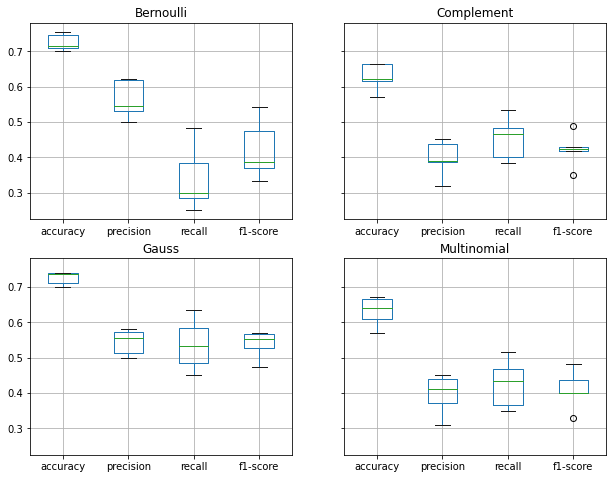

In [256]:
df_score.groupby(['Model']).boxplot(figsize=(10,8))

Text(42.0, 0.5, 'Model')

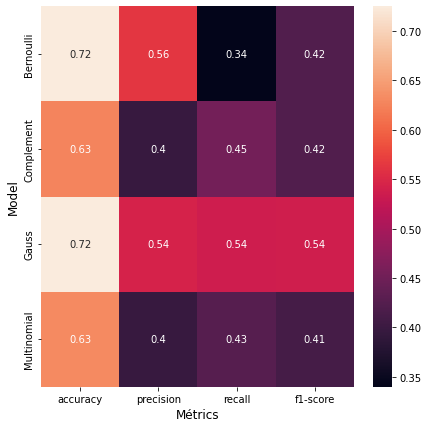

In [257]:
fig, ax = plt.subplots(figsize=(7,7)) 
s = sns.heatmap(df_score.groupby(['Model']).mean(), annot=True, ax=ax)
s.set_xlabel('Métrics', fontsize=12)
s.set_ylabel('Model', fontsize=12)